<a href="https://www.kaggle.com/code/mayanderikoma/google-data-analytics-capstone-project-bike-share?scriptVersionId=177876927" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Google Data Analytics Capstone: Bike-Share Case Study


### Author: Mayan Derikoma

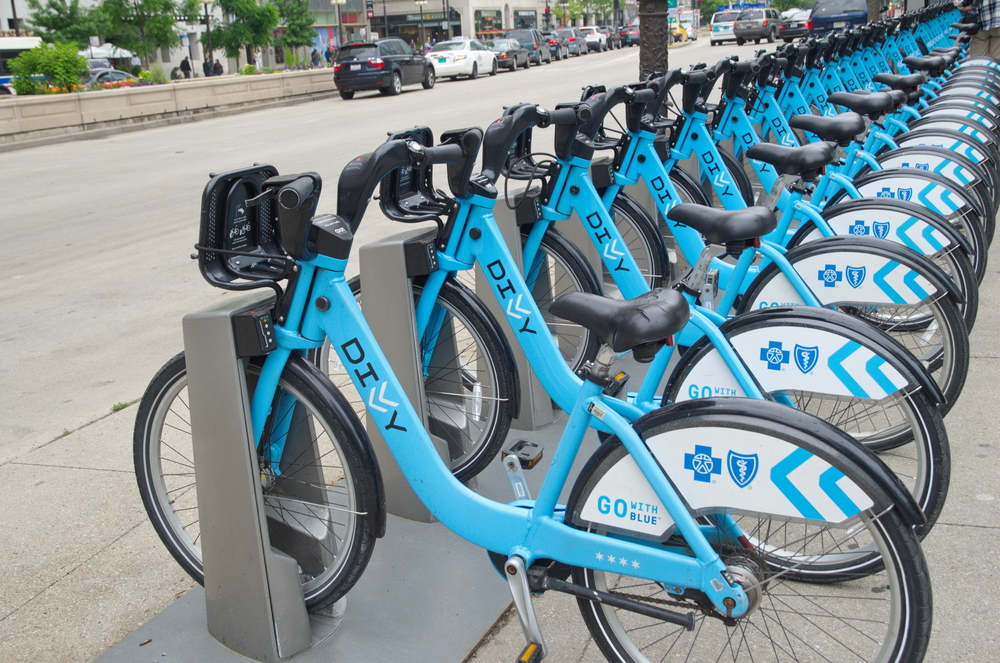

## About this project
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations

# 1. **Ask**

### **Business Task** 
The goal of this project is to convert casual users into members in order to maximize the company's future success. To accomplish this, we need to gain a better understanding of casuals' behavior. A comparison of casual and member users would be helpful.

### **Stakeholders**
Lily Moreno: Director of Marketing.

Cyclistic Executive Team: The notoriously detail-oriented executive team will decide whether to approve the
recommended marketing program.

 Cyclistic Marketing Analytics Team: A team of data analysts who are responsible for collecting, analyzing, and
reporting data that helps guide Cyclistic marketing strategy.

# 2. **Prepare**

* The dataset have a different name because Cyclistic is a fictional company. However, it's real data and it comes from [Divvy](https://divvybikes.com/) Bikes from Chicago, IL.

* [Motivation International Inc.](https://divvy-tripdata.s3.amazonaws.com/index.html) has licensed the data for public use.

* A 12-month history of cyclist trips has been downloaded. The period between March 2021 and February 2022.



# 3. **Process**

In [2]:
#Importing Pandas and NumPy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#importing datasets

df_jan = pd.read_csv("/kaggle/input/divvy-trip-data-jan-to-dec-2023/divvy-trip-data-jan-to-dec-2023/202301-divvy-tripdata.csv") 
df_feb = pd.read_csv("/kaggle/input/divvy-trip-data-jan-to-dec-2023/divvy-trip-data-jan-to-dec-2023/202302-divvy-tripdata.csv")
df_march = pd.read_csv("/kaggle/input/divvy-trip-data-jan-to-dec-2023/divvy-trip-data-jan-to-dec-2023/202303-divvy-tripdata.csv")
df_april = pd.read_csv("/kaggle/input/divvy-trip-data-jan-to-dec-2023/divvy-trip-data-jan-to-dec-2023/202304-divvy-tripdata.csv")
df_may = pd.read_csv("/kaggle/input/divvy-trip-data-jan-to-dec-2023/divvy-trip-data-jan-to-dec-2023/202305-divvy-tripdata.csv")
df_june = pd.read_csv("/kaggle/input/divvy-trip-data-jan-to-dec-2023/divvy-trip-data-jan-to-dec-2023/202306-divvy-tripdata.csv")
df_july = pd.read_csv("/kaggle/input/divvy-trip-data-jan-to-dec-2023/divvy-trip-data-jan-to-dec-2023/202307-divvy-tripdata.csv")
df_aug = pd.read_csv("/kaggle/input/divvy-trip-data-jan-to-dec-2023/divvy-trip-data-jan-to-dec-2023/202308-divvy-tripdata.csv")
df_sept = pd.read_csv("/kaggle/input/divvy-trip-data-jan-to-dec-2023/divvy-trip-data-jan-to-dec-2023/202309-divvy-tripdata.csv")
df_oct = pd.read_csv("/kaggle/input/divvy-trip-data-jan-to-dec-2023/divvy-trip-data-jan-to-dec-2023/202310-divvy-tripdata.csv")
df_nov = pd.read_csv("/kaggle/input/divvy-trip-data-jan-to-dec-2023/divvy-trip-data-jan-to-dec-2023/202311-divvy-tripdata.csv")
df_dec = pd.read_csv("/kaggle/input/divvy-trip-data-jan-to-dec-2023/divvy-trip-data-jan-to-dec-2023/202312-divvy-tripdata.csv")

In [4]:
#Concatenate all dataframes into one and checking it.

data_frames = [df_jan, df_feb, df_march, df_april, df_may, df_june, df_july, df_aug, df_sept, df_oct, df_nov, df_dec]
df = pd.concat(data_frames)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719877 entries, 0 to 224072
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 610.9+ MB


In [5]:
#viewing the dataframe

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [6]:
#Creating a copy of the DataFrame

df_copy = df.copy(deep=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719877 entries, 0 to 224072
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 610.9+ MB


In [7]:
#Checking for unique values

df_copy.nunique()

ride_id               5719877
rideable_type               3
started_at            4823909
ended_at              4835702
start_station_name       1592
start_station_id         1516
end_station_name         1597
end_station_id           1520
start_lat              789702
start_lng              748738
end_lat                 13884
end_lng                 14002
member_casual               2
dtype: int64

In [8]:
#Checking for duplicate values on"ride_id". Each "ride_id" must be unique.

df_copy.ride_id.duplicated().sum()

0

There is no duplicate value, we got 0.

we would check for null values next

In [9]:
#Checking for Null values

df_copy.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

In [10]:
#Dropping all the NaN values

df_copy.dropna(inplace= True)
df_copy.isna().sum()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4331707 entries, 0 to 224072
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 462.7+ MB


From observation, the started_at and ended_at columns are in object format. This is the wrong data type. We would convert both columns to datetime format.
Then next, we would create a new column that would tell us the ride length

In [11]:
#converting the started_at and ended_at to datetime

df_copy['started_at'] = pd.to_datetime(df_copy['started_at'])
df_copy['ended_at'] = pd.to_datetime(df_copy['ended_at'])
df_copy.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4331707 entries, 0 to 224072
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 462.7+ MB


In [12]:
#creating the ride_length column to calculate ride length

df_copy['ride_length'] = round((df_copy['ended_at'] - df_copy['started_at']).dt.total_seconds()/ 60, 2)
df_copy

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,10.85
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.48
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,13.23
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.77
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,15.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224068,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual,2.22
224069,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,3.58
224070,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,3.83
224071,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,41.885492,-87.652289,casual,17.63


We would also create a new column called day of week, after which we would rearrange our data for analysis

In [13]:
#Creating the day_of_week column

df_copy["day_of_week"]= df_copy["started_at"].dt.day_name()
df_copy.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,10.85,Saturday
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.48,Tuesday
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,13.23,Monday
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.77,Sunday
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,15.32,Thursday


In [14]:
#rearrnging the columns

new_cols= ["ride_id", "rideable_type", "started_at", "ended_at", "ride_length", "day_of_week",
           "start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat",
           "start_lng", "end_lat", "end_lng", "member_casual"]
df_copy= df_copy.reindex(columns= new_cols)
df_copy.head()

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,10.85,Saturday,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,8.48,Tuesday,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,13.23,Monday,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,8.77,Sunday,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,15.32,Thursday,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [15]:
#Confirming the columns have the correct data type

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4331707 entries, 0 to 224072
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   ride_length         float64       
 5   day_of_week         object        
 6   start_station_name  object        
 7   start_station_id    object        
 8   end_station_name    object        
 9   end_station_id      object        
 10  start_lat           float64       
 11  start_lng           float64       
 12  end_lat             float64       
 13  end_lng             float64       
 14  member_casual       object        
dtypes: datetime64[ns](2), float64(5), object(8)
memory usage: 528.8+ MB


Our data is squeaky clean and ready for analysis. All columns have the correct data type, there is no missing or duplicate values. so we can proceed to the next phase.

# 4. **Analyze**

#### Statistical Summary
Let us have a statistical summary of the dataset, and we would be able to gain some insights from it 

In [16]:
#statistical summary of the ride_length column to gather the total minutes of rides, the mean, max and min
df_copy["ride_length"].describe()

count    4.331707e+06
mean     1.595184e+01
std      3.608720e+01
min     -5.457000e+01
25%      5.620000e+00
50%      9.800000e+00
75%      1.748000e+01
max      1.213630e+04
Name: ride_length, dtype: float64

#### Statistical summary interpretation

* The total ride length of rides by users is 4331707 minutes, approximately 1203.25hours
* The average ride length is 15.95 minutes
* The minimum ride length is 5.5 minutes
* The maximum ride length is 12136 minutes approx. 3.37hours

#### **Business Task**

**How do annual members and casual riders use Cyclistic bikes differently?**

*We would perform the following calculations to generate valuable insights

* The mean of ride_length
* The max of ride_length
* The mode of the day_of_week

*We would also count the number of users who are Members and those that are casual riders. Then we would analyze the following:*

* The Average ride_length for members
* The Average ride_length for casual_riders
* The Average ride_length for users by day_of_week
* The number of rides for users by day_of_week  

In [17]:
#The mean of ride length

mean_ride_length= df_copy["ride_length"].mean()
print(mean_ride_length)

15.951844896249899


In [18]:
#The max of ride length

max_ride_length= df_copy["ride_length"].max()
print(max_ride_length)

12136.3


In [19]:
#The mode of day_of_week

mode_of_week= df_copy["day_of_week"].mode()
print(mode_of_week)
#The day of the week with the most rides is Saturday

0    Saturday
dtype: object


In [20]:
#Count of casual riders

casual_riders= df_copy["member_casual"].value_counts()["casual"]
print(casual_riders)
#number of casual riders are 1531757

1531757


In [21]:
#Count of riders who are members

members= df_copy["member_casual"].value_counts()["member"]
print(members)
#Number of members are 2799950

2799950


In [22]:
#Total count of distinct users

distinct_users= df_copy["ride_id"].nunique()
print(distinct_users)
#Total users are 4331707 which matches with our count of rows above, so every useris unique

4331707


In [23]:
#Average ride length for members and casual

avg_ride_length= df_copy.groupby("member_casual")["ride_length"].mean()
print(avg_ride_length)
#Average ride_length for casual is 22.937
#Average ride_length for member is 12.13

member_casual
casual    22.936211
member    12.130937
Name: ride_length, dtype: float64


In [24]:
#Average ride_length for users by day_of_week
Avg_ride_length_by_day= df_copy.groupby("day_of_week")["ride_length"].mean()
print(Avg_ride_length_by_day)

day_of_week
Friday       15.766530
Monday       14.977336
Saturday     19.371606
Sunday       19.474096
Thursday     14.164728
Tuesday      14.200623
Wednesday    13.893206
Name: ride_length, dtype: float64


In [26]:
#Number of rides for users by day_of_week

rides_per_day= df_copy.groupby("day_of_week")["ride_id"].count()
print(rides_per_day)

day_of_week
Friday       628376
Monday       562098
Saturday     660811
Sunday       562631
Thursday     651591
Tuesday      630387
Wednesday    635813
Name: ride_id, dtype: int64


In [ ]:
#Output dataset CSV. Not running 

df_copy.to_csv('bike_share_cleaned.csv', index = False)

# 5. **Share**

Would build visualizations to share our analysis

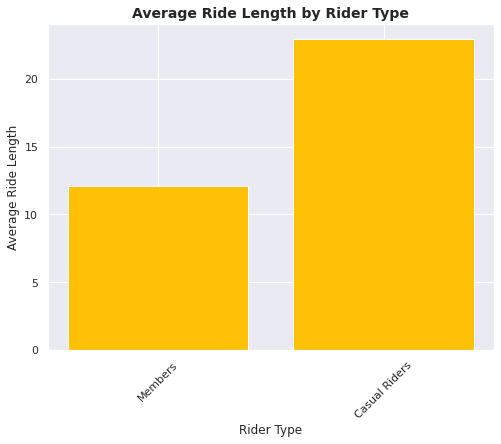

In [27]:
#Plotting the Average ride_length for both members and casual riders


members_avg = df_copy[df_copy["member_casual"] == "member"]["ride_length"].mean()
casual_avg = df_copy[df_copy["member_casual"] == "casual"]["ride_length"].mean()

labels = ["Members", "Casual Riders"]
values = [members_avg, casual_avg]

plt.figure(figsize= (8,6))
plt.bar(x= labels, 
        height= values,
        color= "#FFC107")
plt.xticks(rotation= 45)
plt.xlabel("Rider Type", fontsize= 12)
plt.ylabel("Average Ride Length", fontsize= 12)
plt.title("Average Ride Length by Rider Type", fontsize= 14, weight= "bold")
plt.show()


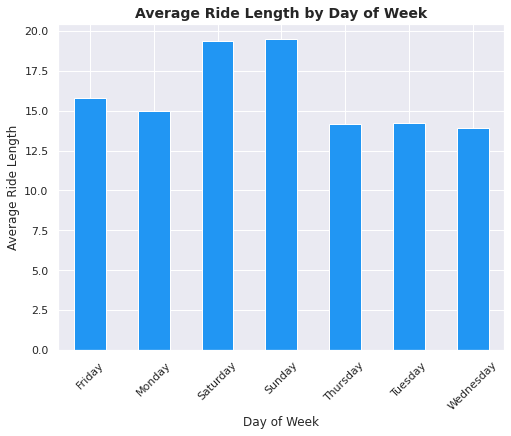

In [40]:
#Plotting the average ride_length by day_of_week

plt.figure(figsize= (8,6))
df_copy.groupby("day_of_week")["ride_length"].mean().plot(kind="bar", color= "#2196F3")
plt.xticks(rotation= 45)
plt.xlabel("Day of Week")
plt.ylabel("Average Ride Length")
plt.title("Average Ride Length by Day of Week", fontsize= 14, weight= "bold")
plt.show()


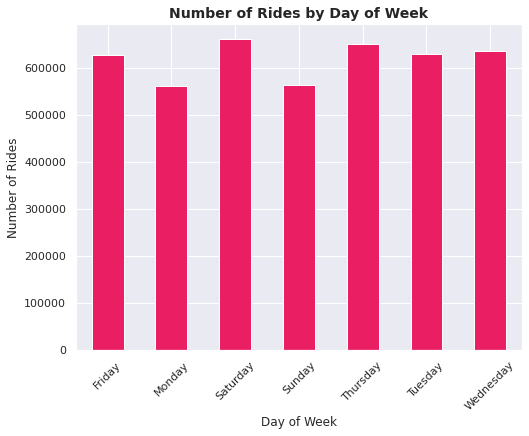

In [42]:
#Plotting of number of rides by day_of_week

plt.figure(figsize= (8,6))
df_copy.groupby("day_of_week")["ride_id"].count().plot(kind= "bar", color= "#E91E63")
plt.xticks(rotation= 45)
plt.xlabel("Day of Week", size= 12)
plt.ylabel("Number of Rides", size= 12)
plt.title("Number of Rides by Day of Week", fontsize= 14, weight= "bold")
plt.show()



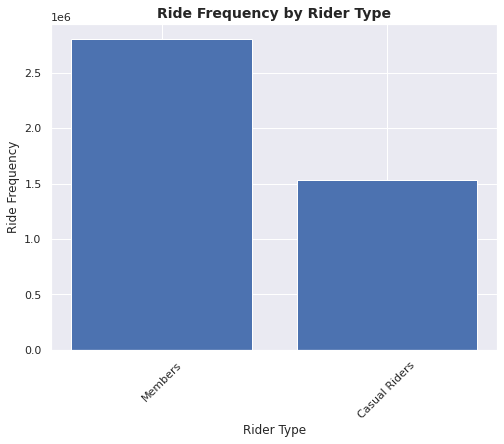

In [44]:
#Bar chart to compare ride frequency between members and casual riders:

members_ride_frequency = df_copy[df_copy["member_casual"] == "member"]["ride_id"].count()
casual_ride_frequency = df_copy[df_copy["member_casual"] == "casual"]["ride_id"].count()

labels = ["Members", "Casual Riders"]
values = [members_ride_frequency, casual_ride_frequency]
plt.figure(figsize= (8,6))
plt.bar(labels, values)
plt.xticks(rotation= 45)
plt.xlabel("Rider Type")
plt.ylabel("Ride Frequency")
plt.title("Ride Frequency by Rider Type", size= 14, weight= "bold")
plt.show()


# 6. **Act**

### Insights from the Analysis:
* Member users make up about 70% of the total users .

* The average trip time for casual riders was 22.93 minutes, while the average for members was 12.13 minutes

* Saturdays recorded the day with the most rides.

* Members bike the most during rush hours on weekdays. On weekends, casual riders outnumber them at any time of the day.

* Although members had more ride frequency,the casual riders recorded more ride length



### Recommendations:
* It is good to know that the majority of users are members, but more incentives should be used to lure casual users to subscribe to a membership plan, like developing flexible and shorter subscription period.

* The member users recorded shorter ride lengths. They should be encouragedd to use the bikes for longer distance. A concern could be proximity to bike stations. we recommend creating more stations for users to access and return bikes.

* Casual users had a less bike use frequency, perhaps the limiting factor to a subscription dicouraged usage. Kindly refer to our earlier recommendation of more flexible subscription plans.